In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [5]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [6]:
classLabels = [] # empty list of python 
file_name = "Labels.txt"
with open (file_name , "rt") as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    #classLabels.append(fpt.read())
    

In [7]:
print(classLabels)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']


In [8]:
print(len(classLabels))

91


In [12]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ## 255/2 = 127.5
model.setInputMean((127.5,127.5,127.5)) ## mobilenet -> [-1,1]
model.setInputSwapRB(True) ## to convert from bgr to rgb

< cv2.dnn.Model 0000020A0718F6D0>

# read an image
 


In [9]:
img = cv2.imread('bill.jpg')# bgr

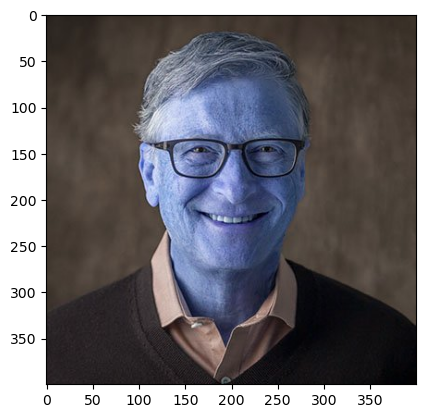

In [10]:
plt.imshow(img)

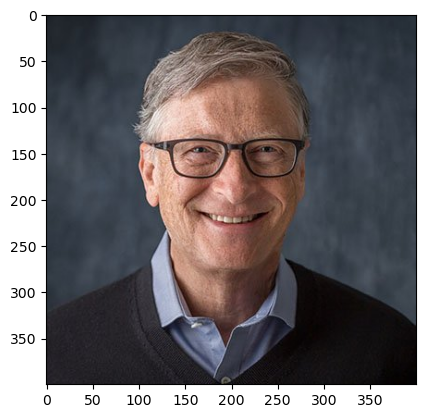

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [13]:
ClassIndex , confidence , bbox = model.detect(img, confThreshold = 0.5)

In [14]:
print(ClassIndex)

[ 1 32]


In [22]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)




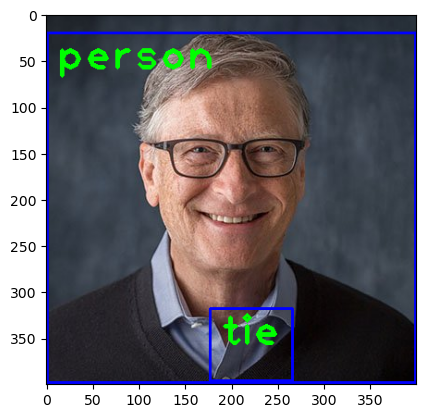

In [23]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))